In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
#data is on https://www.kaggle.com/datasnaek/youtube-new?select=CAvideos.csv
#we aim to figure out the best ways to maxmise views

data is on https://www.kaggle.com/datasnaek/youtube-new?select=CAvideos.csv

In [2]:
df = pd.read_csv("CAvideos.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [4]:
#search for null or missing data
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


# Views & Engagement Correlation

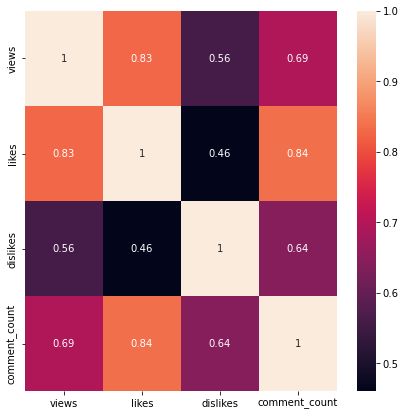

In [6]:
plt.figure(figsize = (7,7))
sns.heatmap(df[['views', 'likes', 'dislikes','comment_count']].corr(), annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


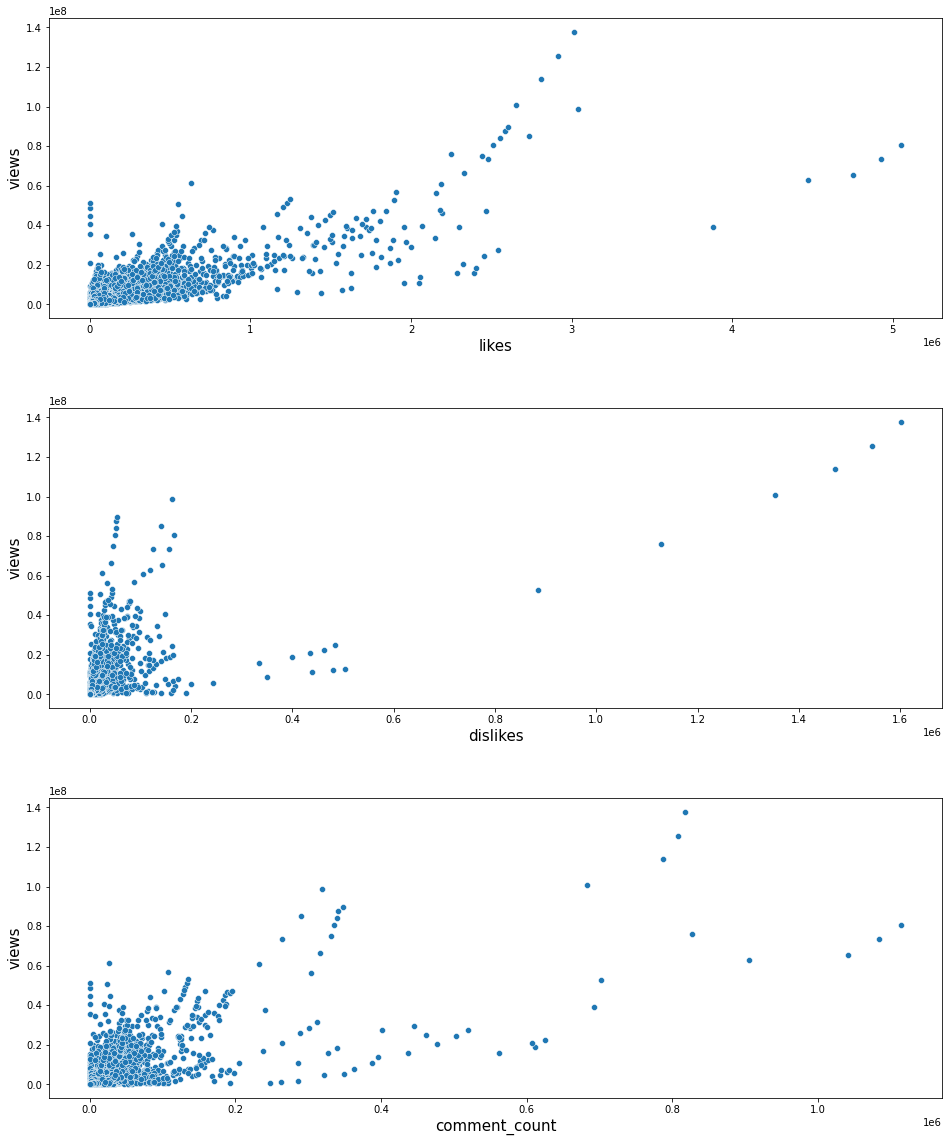

In [7]:
plt.figure(figsize = (16,8))

plt.subplot(311)
g = sns.scatterplot(df['likes'],df['views'])
g.set_xlabel("likes", fontsize=15)
g.set_ylabel("views", fontsize=15)

plt.subplot(312)
g = sns.scatterplot(df['dislikes'],df['views'])
g.set_xlabel("dislikes", fontsize=15)
g.set_ylabel("views", fontsize=15)

plt.subplot(313)
g = sns.scatterplot(df['comment_count'],df['views'])
g.set_xlabel("comment_count", fontsize=15)
g.set_ylabel("views", fontsize=15)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 2)

plt.show()

### views seem to be have high correlation with likes and moderate correlation with comments

# Views & Video type

In [8]:
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

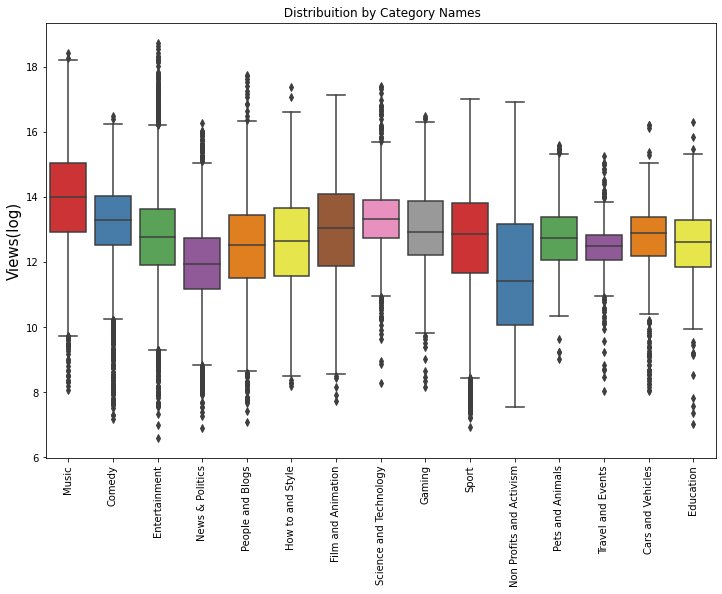

In [9]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

plt.figure(figsize = (12,8))
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title(" Distribuition by Category Names")
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.show()

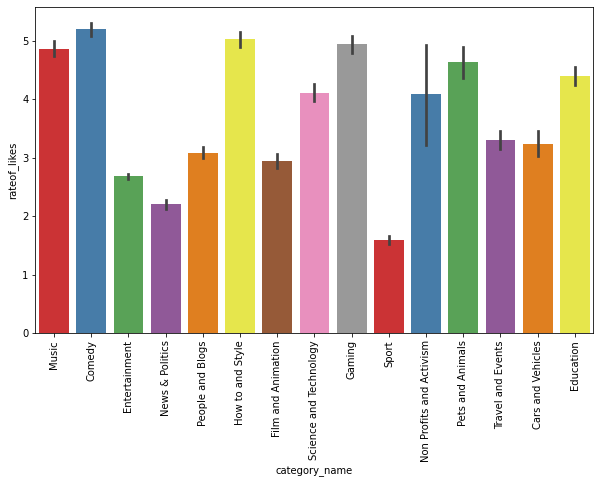

In [10]:
df['rateof_likes'] =  df['likes'] / df['views'] * 100
df['rateof_dislikes'] =  df['dislikes'] / df['views'] * 100
df['rateof_comment'] =  df['comment_count'] / df['views'] * 100
#df['like/dislike']=df['likes'] / df['dislikes'] * 100
plt.figure(figsize = (10,6))
sns.barplot(x='category_name', y='rateof_likes', data=df, palette="Set1")
plt.xticks(rotation=90)
#sns.heatmap(df[['like/dislike','rateof_likes', 'rateof_dislikes', 'rateof_comment', 'comment_log','views','views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show()

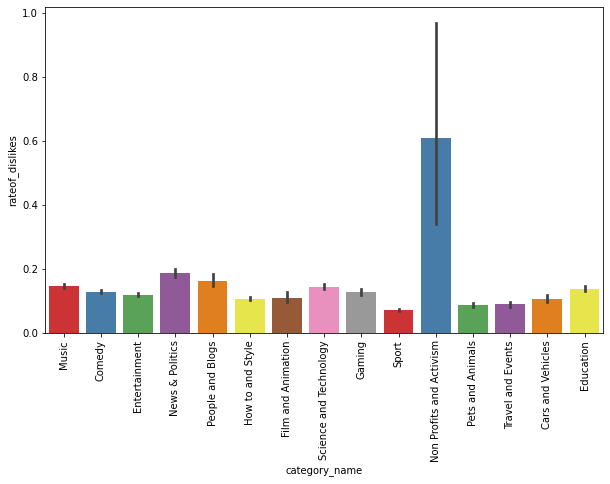

In [11]:
plt.figure(figsize = (10,6))
sns.barplot(x='category_name', y='rateof_dislikes', data=df, palette="Set1")
plt.xticks(rotation=90);

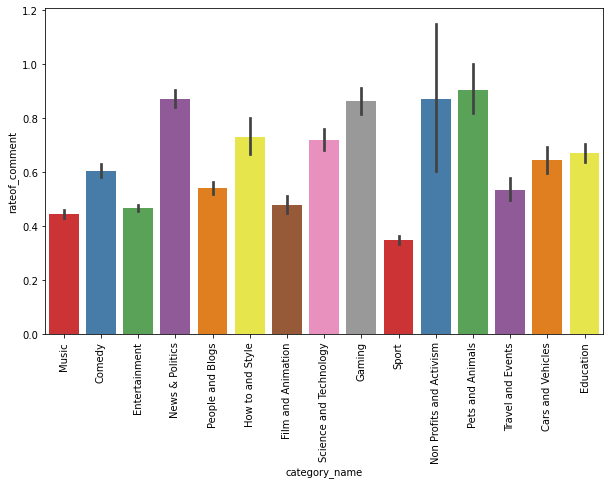

In [12]:
plt.figure(figsize = (10,6))
sns.barplot(x='category_name', y='rateof_comment', data=df, palette="Set1")
plt.xticks(rotation=90);

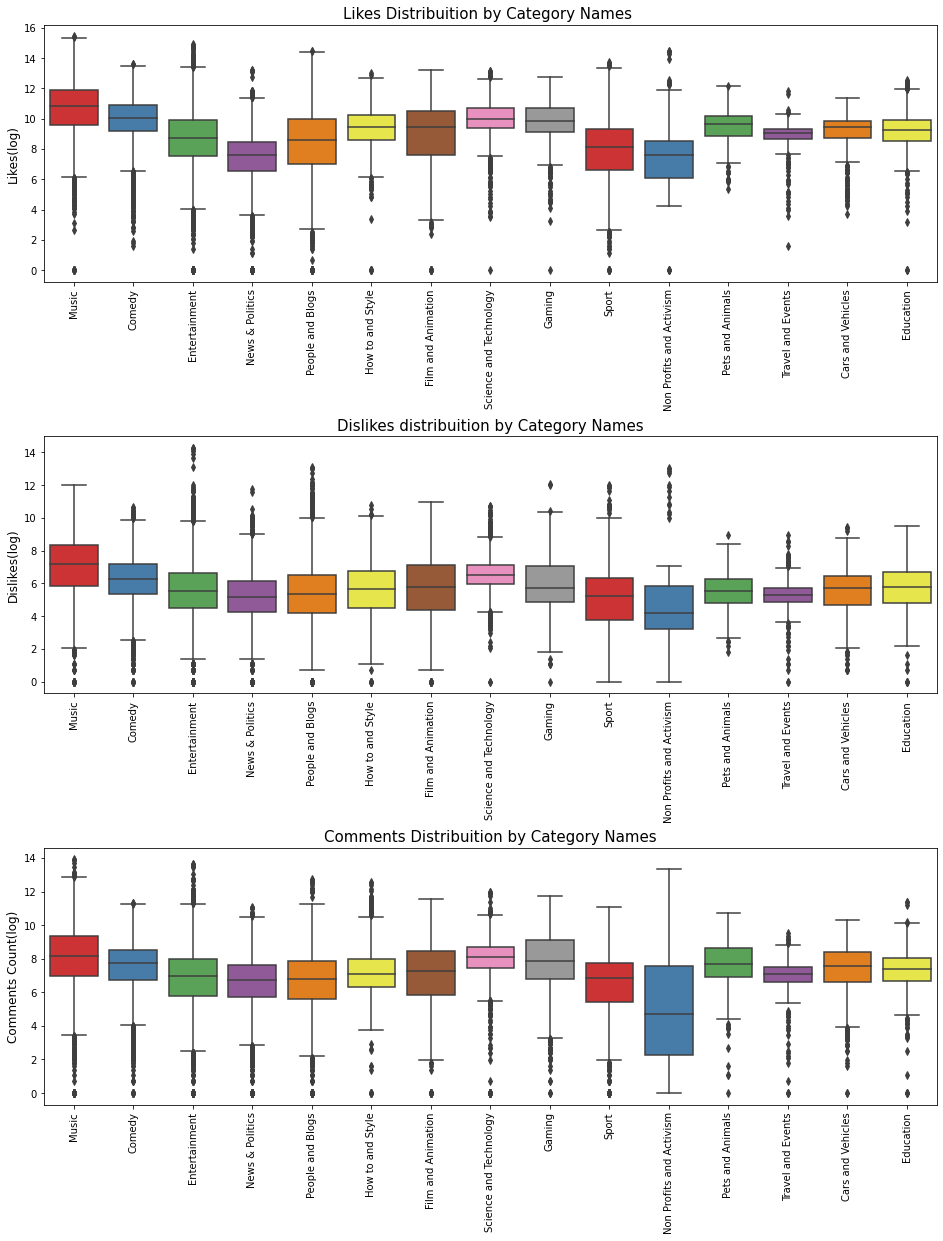

In [13]:
plt.figure(figsize = (16,8))
plt.subplot(311)
g = sns.boxplot(x='category_name', y='likes_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)

plt.subplot(312)
g = sns.boxplot(x='category_name', y='dislikes_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Dislikes distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)

plt.subplot(313)
g = sns.boxplot(x='category_name', y='comment_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 2)





plt.show()

In [14]:
warnings.filterwarnings("ignore")

# Effect of Disabling Comments 

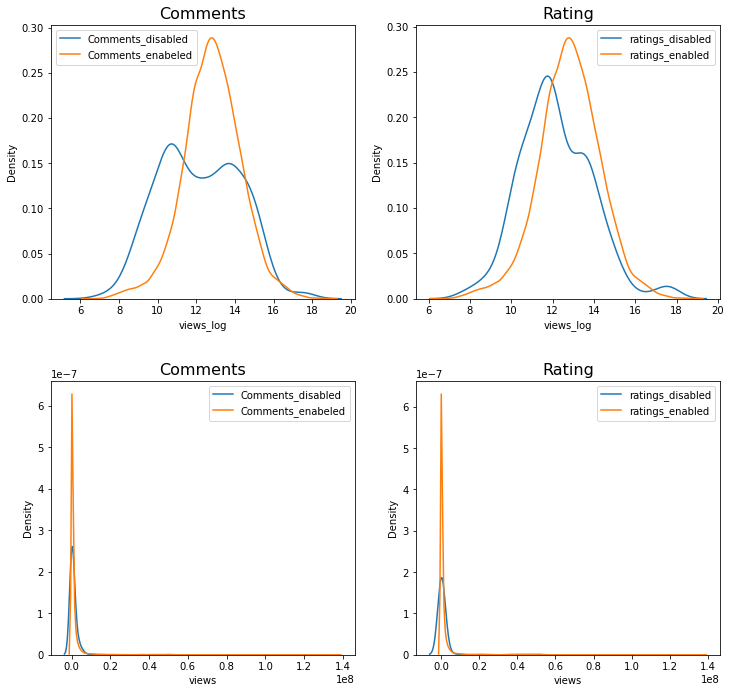

In [15]:
plt.figure(figsize = (12,10))

plt.subplot(221)
g1 = sns.distplot(df[df['comments_disabled'] == True]['views_log'], 
                  hist=False, label='Comments_disabled')
g1 = sns.distplot(df[df['comments_disabled'] == False]['views_log'], 
                  hist=False, label='Comments_enabeled')
g1.set_title("Comments", fontsize=16)
g1.legend()

plt.subplot(222)
g1 = sns.distplot(df[df['ratings_disabled'] == True]['views_log'], 
                  hist=False, label='ratings_disabled')
g1 = sns.distplot(df[df['ratings_disabled'] == False]['views_log'], 
                  hist=False, label='ratings_enabled')
g1.set_title("Rating", fontsize=16)#rating is likes and dislikes
g1.legend()

plt.subplot(223)
g1 = sns.distplot(df[df['comments_disabled'] == True]['views'], 
                  hist=False, label='Comments_disabled')
g1 = sns.distplot(df[df['comments_disabled'] == False]['views'], 
                  hist=False, label='Comments_enabeled')
g1.set_title("Comments", fontsize=16)
g1.legend()

plt.subplot(224)
g1 = sns.distplot(df[df['ratings_disabled'] == True]['views'], 
                  hist=False, label='ratings_disabled')
g1 = sns.distplot(df[df['ratings_disabled'] == False]['views'], 
                  hist=False, label='ratings_enabled')
g1.set_title("Rating", fontsize=16)#rating is likes and dislikes
g1.legend()

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 1)

# Best Day to upload

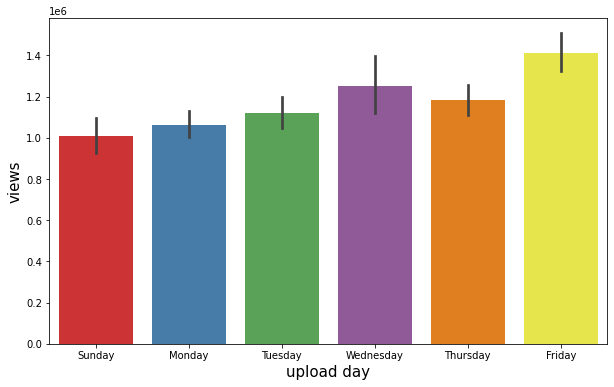

In [16]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['weekday'] = df['publish_time'].dt.weekday
df=df.replace({'weekday':{0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}})

plt.figure(figsize = (10,6))

g1 = sns.barplot(x='weekday', y='views', data=df, palette="Set1",order=['Sunday','Monday','Tuesday','Wednesday',
                                                                        'Thursday','Friday'])
g1.set_xlabel("upload day", fontsize=15)
g1.set_ylabel("views", fontsize=15)

plt.show()